### Multiclass Classification using Random Forest and Logistic Regression

In [ ]:
# We want to predict handwritten numerical digits

In [ ]:
# Let us install the tensorflow module
!pip install tensorflow

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
import warnings
warnings.filterwarnings("ignore")
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 7 - Artificial Neural Networks with TensorFlow'

## Using the TensorFlow Digit Data

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

In [ ]:
Xtrain_matrix = X_train_flattened[0].reshape((28,28))

In [ ]:
plt.matshow(Xtrain_matrix)

In [ ]:
# How to concatenate two numpy arrays horizontally
digits_array =np.c_[X_train_flattened, y_train]
digits_array

In [4]:
# Saving the numpy dataset as csv
np.savetxt("Neural_networks_digits_dataset.csv", digits_array, fmt="%d", delimiter=",")

NameError: name 'digits_array' is not defined

In [7]:
# Loading datasets as numpy array
digits_arr = np.loadtxt('Neural_networks_digits_dataset.csv', delimiter=',', dtype=int)
digits_arr

array([[0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 6],
       [0, 0, 0, ..., 0, 0, 8]])

In [8]:
# Extracting the features
dg_features = digits_arr[:,0:784]
dg_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
# Extracting the targets
dg_target = digits_arr[:,784]
dg_target

array([5, 0, 4, ..., 5, 6, 8])

In [10]:
## Splitting our datasets into training and test
from sklearn.model_selection import train_test_split

In [11]:
# Creating your train, test split
X_train, X_test, y_train, y_test = train_test_split(dg_features,dg_target,test_size=0.25)

In [12]:
# Investigating some few data

In [13]:
input_features = X_train.shape[1]
input_features

784

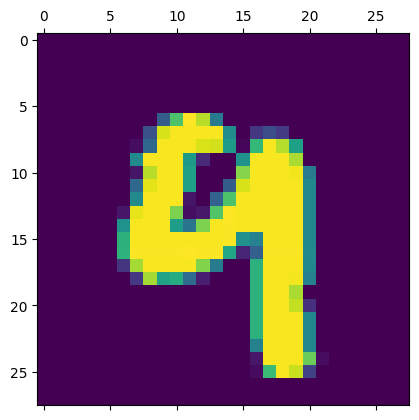

In [14]:
# Investigating train data at index 0
Xtrain_matrix = X_train[0].reshape((28,28))
plt.matshow(Xtrain_matrix)

In [15]:
y_train[0]

9

In [16]:
# Checking the unique values using set
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
# Checking the number unique values using set
output_options = len(set(y_train))
output_options

10

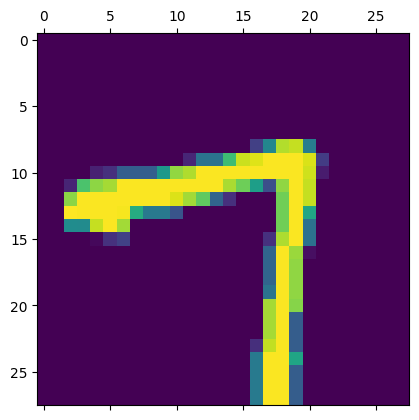

In [18]:
# Investigating train data at index 6
Xtrain_matrix = X_train[29].reshape((28,28))
plt.matshow(Xtrain_matrix)

In [19]:
y_train[29]

7

In [20]:
# Creating, compiling, and fitting our neural network model
# output_options = 10

ai_model = tf.keras.Sequential()
ai_model.add(tf.keras.layers.Dense(input_features)) # 784 input features
ai_model.add(tf.keras.layers.Dense(output_options, activation='sigmoid')) #Output options and activation
#It can be relu, softmax, softsign, tanh, selu, elu, exponential, PRelu, LeakyReLu

# Compiling the neural network model
ai_model.compile(
    optimizer='adam', # Others are: 'SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl', 'AdamW', 'Adafactor'
    loss='sparse_categorical_crossentropy', # Others are: categorical_crossentropy, poisson, kl_divergence, binary_crossentropy
    metrics=['accuracy'] # Others are: binary_accuracy, categorical_accuracy, sparse_categorical_accuracy 
)

# Fitting the model with train data
training_times = 10
ai_model.fit(X_train,y_train, epochs=training_times)

Epoch 1/10
1407/1407 [==============================] - 18s 12ms/step - loss: 25.0879 - accuracy: 0.8503
Epoch 2/10
1407/1407 [==============================] - 21s 15ms/step - loss: 6.3837 - accuracy: 0.8527
Epoch 3/10
1407/1407 [==============================] - 17s 12ms/step - loss: 5.6480 - accuracy: 0.8459
Epoch 4/10
1407/1407 [==============================] - 17s 12ms/step - loss: 5.9662 - accuracy: 0.8478
Epoch 5/10
1407/1407 [==============================] - 24s 17ms/step - loss: 5.8809 - accuracy: 0.8579
Epoch 6/10
1407/1407 [==============================] - 17s 12ms/step - loss: 5.9729 - accuracy: 0.8642
Epoch 7/10
1407/1407 [==============================] - 20s 14ms/step - loss: 6.3164 - accuracy: 0.8672
Epoch 8/10
1407/1407 [==============================] - 24s 17ms/step - loss: 6.3916 - accuracy: 0.8686
Epoch 9/10
1407/1407 [==============================] - 22s 16ms/step - loss: 6.5011 - accuracy: 0.8727
Epoch 10/10
1407/1407 [==============================] - 23s 16

In [21]:
# Evaluating with Test Data
ai_model.evaluate(X_test, y_test)

469/469 [==============================] - 3s 5ms/step - loss: 8.1262 - accuracy: 0.8532


[8.126246452331543, 0.8532000184059143]

## Applying Scaling to improve accuracy

In [22]:
max_val = dg_features.max()
max_val

255

In [23]:
# Scaling each data by the maximum value (16)
scal_Xtrain = X_train/max_val
scal_Xtest = X_test/max_val

In [24]:
# Creating, compiling, and fitting our neural network model
# output_options = 10

ai_model = tf.keras.Sequential()
ai_model.add(tf.keras.layers.Dense(input_features)) # 784 input features
ai_model.add(tf.keras.layers.Dense(output_options, activation='sigmoid')) #Output options and activation
#It can be relu, softmax, softsign, tanh, selu, elu, exponential, PRelu, LeakyReLu

# Compiling the neural network model
ai_model.compile(
    optimizer='adamax', # Others are: 'SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl', 'AdamW', 'Adafactor'
    loss='sparse_categorical_crossentropy', # Others are: categorical_crossentropy, poisson, kl_divergence, binary_crossentropy
    metrics=['accuracy'] # Others are: binary_accuracy, categorical_accuracy, sparse_categorical_accuracy 
)

# Fitting the model with train data
training_times = 10
ai_model.fit(scal_Xtrain,y_train, epochs=training_times)

Epoch 1/10
1407/1407 [==============================] - 25s 16ms/step - loss: 0.3679 - accuracy: 0.8949
Epoch 2/10
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2985 - accuracy: 0.9162
Epoch 3/10
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/10
1407/1407 [==============================] - 23s 17ms/step - loss: 0.2761 - accuracy: 0.9231
Epoch 5/10
1407/1407 [==============================] - 20s 15ms/step - loss: 0.2724 - accuracy: 0.9243
Epoch 6/10
1407/1407 [==============================] - 27s 19ms/step - loss: 0.2675 - accuracy: 0.9245
Epoch 7/10
1407/1407 [==============================] - 26s 18ms/step - loss: 0.2641 - accuracy: 0.9262
Epoch 8/10
1407/1407 [==============================] - 29s 21ms/step - loss: 0.2608 - accuracy: 0.9267
Epoch 9/10
1407/1407 [==============================] - 29s 21ms/step - loss: 0.2575 - accuracy: 0.9286
Epoch 10/10
1407/1407 [==============================] - 28s 20m

In [25]:
# Evaluating with Test Data
ai_model.evaluate(scal_Xtest, y_test)

469/469 [==============================] - 3s 6ms/step - loss: 0.3077 - accuracy: 0.9164


[0.3076544404029846, 0.9164000153541565]

In [26]:
# Using my Best optimizer (Adam)
# Creating, compiling, and fitting our neural network model
# output_options = 10

ai_model = tf.keras.Sequential()
ai_model.add(tf.keras.layers.Dense(input_features)) # 784 input features
ai_model.add(tf.keras.layers.Dense(output_options, activation='sigmoid')) #Output options and activation
#It can be relu, softmax, softsign, tanh, selu, elu, exponential, PRelu, LeakyReLu

# Compiling the neural network model
ai_model.compile(
    optimizer='adam', # Others are: 'SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl', 'AdamW', 'Adafactor'
    loss='sparse_categorical_crossentropy', # Others are: categorical_crossentropy, poisson, kl_divergence, binary_crossentropy
    metrics=['accuracy'] # Others are: binary_accuracy, categorical_accuracy, sparse_categorical_accuracy 
)

# Fitting the model with train data
training_times = 10
ai_model.fit(scal_Xtrain,y_train, epochs=training_times)

Epoch 1/10
1407/1407 [==============================] - 25s 17ms/step - loss: 0.3811 - accuracy: 0.8918
Epoch 2/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3252 - accuracy: 0.9079
Epoch 3/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3139 - accuracy: 0.9124
Epoch 4/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.3011 - accuracy: 0.9148
Epoch 5/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2932 - accuracy: 0.9177
Epoch 6/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2898 - accuracy: 0.9173
Epoch 7/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2847 - accuracy: 0.9200
Epoch 8/10
1407/1407 [==============================] - 23s 17ms/step - loss: 0.2811 - accuracy: 0.9206
Epoch 9/10
1407/1407 [==============================] - 25s 18ms/step - loss: 0.2753 - accuracy: 0.9217
Epoch 10/10
1407/1407 [==============================] - 24s 17m

In [27]:
# Evaluating with Test Data
ai_model.evaluate(scal_Xtest, y_test)

469/469 [==============================] - 3s 6ms/step - loss: 0.3130 - accuracy: 0.9154


[0.3129652142524719, 0.9154000282287598]

In [28]:
# Extracting the predicted test values
y_predicted = ai_model.predict(scal_Xtest)
y_predicted[28]

469/469 [==============================] - 3s 6ms/step


array([0.00106576, 0.99966913, 0.9518389 , 0.94011796, 0.00318983,
       0.31027815, 0.07961791, 0.09858923, 0.95303226, 0.12350307],
      dtype=float32)

In [29]:
np.argmax(y_predicted[28])

1

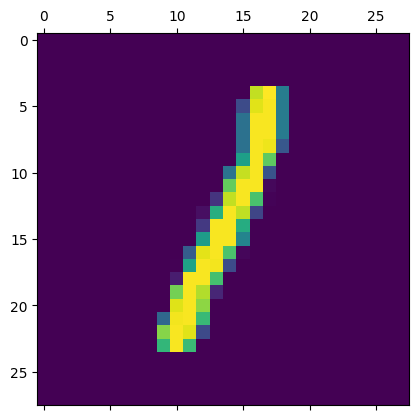

In [30]:
# Investigating test data at index 22
Xtest_matrix = X_test[28].reshape((28,28))
plt.matshow(Xtest_matrix)

In [31]:
# Checking the actual y_test value
y_test[28]

1

In [32]:
# Extracting the actual predictions rather than probability
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [33]:
# Creating a Confusion Matrix
confusion_matrix_v1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix_v1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1433,    1,    5,    2,    1,    9,   15,    8,   13,    2],
       [   0, 1658,    6,    7,    3,    4,    1,    2,   25,    2],
       [   9,   20, 1316,   32,   21,    7,   17,   21,   46,    6],
       [   7,    3,   20, 1357,    3,   60,    6,   17,   31,   20],
       [   6,    0,    4,    1, 1335,    3,   21,    1,   16,   49],
       [  13,    5,    5,   42,    9, 1174,   40,    7,   46,    8],
       [  10,    4,   20,    1,   18,   11, 1422,    1,   11,    0],
       [   1,    6,   12,   20,   21,    7,    1, 1449,    6,   53],
       [   4,   25,    8,   51,    3,   43,   17,    8, 1269,   21],
       [   6,    4,    0,   28,   40,   19,    0,   47,   20, 1312]])>

Text(58.222222222222214, 0.5, 'Actual values')

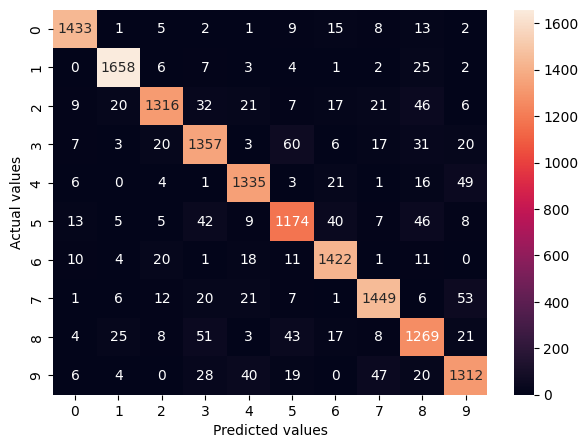

In [34]:
# Using seaborn libary
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix_v1, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
# Using an intermediate Layer to improve accuracy

In [37]:
# Using my Best optimizer (Adam)
# Creating, compiling, and fitting our neural network model
# output_options = 10
# Intermediate neurons = 394

ai_model = tf.keras.Sequential()
ai_model.add(tf.keras.layers.Dense(input_features)) # 784 input features
ai_model.add(tf.keras.layers.Dense(392, activation='leaky_relu')) # Intermediate layer
ai_model.add(tf.keras.layers.Dense(output_options, activation='sigmoid')) #Output activation
#It can be relu, softmax, softsign, tanh, selu, elu, exponential, PRelu, LeakyReLu

# Compiling the neural network model
ai_model.compile(
    optimizer='adam', # Others are: 'SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl', 'AdamW', 'Adafactor'
    loss='sparse_categorical_crossentropy', # Others are: categorical_crossentropy, poisson, kl_divergence, binary_crossentropy
    metrics=['accuracy'] # Others are: binary_accuracy, categorical_accuracy, sparse_categorical_accuracy 
)

# Fitting the model with train data
training_times = 10
ai_model.fit(scal_Xtrain,y_train, epochs=training_times)

Epoch 1/10
1407/1407 [==============================] - 23s 15ms/step - loss: 0.2671 - accuracy: 0.9198
Epoch 2/10
1407/1407 [==============================] - 22s 15ms/step - loss: 0.1655 - accuracy: 0.9516
Epoch 3/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1435 - accuracy: 0.9593
Epoch 4/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1309 - accuracy: 0.9636
Epoch 5/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1253 - accuracy: 0.9658
Epoch 6/10
1407/1407 [==============================] - 22s 15ms/step - loss: 0.1183 - accuracy: 0.9684
Epoch 7/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.1136 - accuracy: 0.9710
Epoch 8/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1012 - accuracy: 0.9740
Epoch 9/10
1407/1407 [==============================] - 22s 15ms/step - loss: 0.1148 - accuracy: 0.9732
Epoch 10/10
1407/1407 [==============================] - 22s 16m

In [38]:
# Evaluating with Test Data
# batch_size is what ratio of the actual test data should be used
ai_model.evaluate(scal_Xtest, y_test, batch_size=10)

1500/1500 [==============================] - 4s 2ms/step - loss: 0.1828 - accuracy: 0.9686


[0.18283183872699738, 0.9685999751091003]

In [39]:
# Extracting the predicted test values
y_predicted = ai_model.predict(scal_Xtest)
y_predicted[38]

469/469 [==============================] - 2s 4ms/step


array([1.0000000e+00, 5.6338454e-06, 8.2390362e-01, 4.4322853e-05,
       1.9707873e-06, 5.1176612e-06, 9.9976885e-01, 6.1828005e-01,
       5.2898730e-07, 7.9501510e-01], dtype=float32)

In [40]:
np.argmax(y_predicted[38])

0

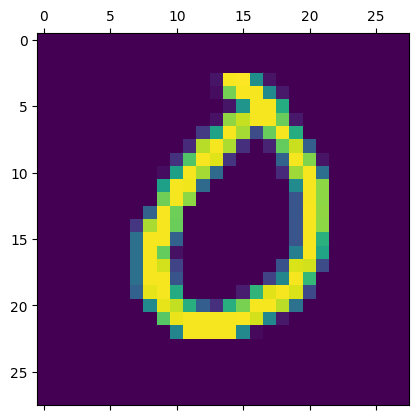

In [41]:
# Investigating test data at index 22
Xtest_matrix = X_test[38].reshape((28,28))
plt.matshow(Xtest_matrix)

In [42]:
# Checking the actual y_test value
y_test[38]

0

In [43]:
# Extracting the actual predictions rather than probability
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [44]:
# Creating a Confusion Matrix
confusion_matrix_v2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix_v2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1470,    0,    5,    2,    0,    1,    1,    3,    4,    3],
       [   0, 1687,    4,    0,    3,    0,    2,    0,   11,    1],
       [   8,   50, 1388,   13,    6,    1,    2,   16,    8,    3],
       [   0,    6,   26, 1465,    0,    7,    0,    5,    9,    6],
       [   5,    0,   26,    2, 1385,    1,    4,    2,    1,   10],
       [   1,    1,    2,  161,    1, 1166,    7,    3,    3,    4],
       [ 115,    0,   30,    1,   16,   55, 1279,    0,    1,    1],
       [   8,    8,   25,   21,   16,    7,    0, 1486,    1,    4],
       [   6,    4,   11,   53,   10,   43,    3,    5, 1309,    5],
       [   3,    1,    5,   39,  239,   31,    0,   65,   11, 1082]])>

Text(58.222222222222214, 0.5, 'Actual values')

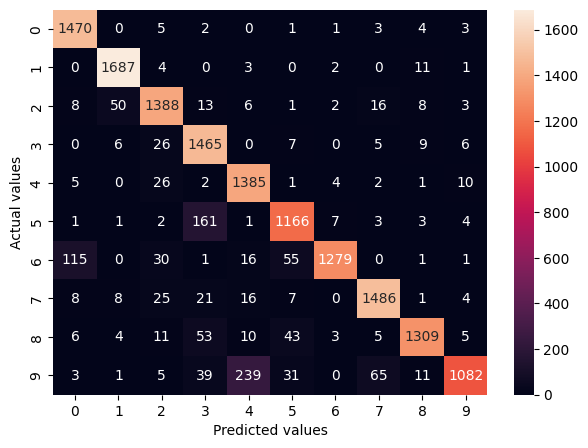

In [45]:
# Using seaborn libary for v2 matrix
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix_v2, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

Text(58.222222222222214, 0.5, 'Actual values')

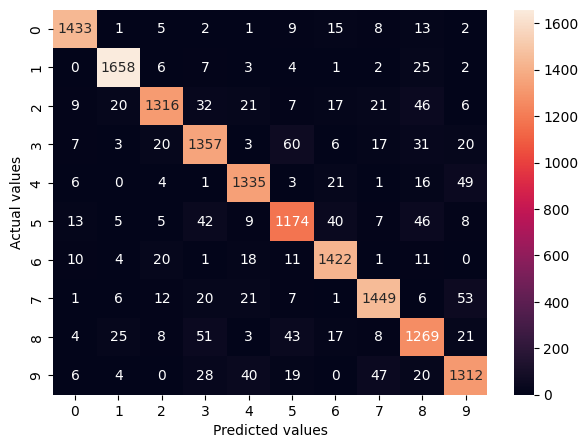

In [46]:
# Using seaborn libary for v1 matrix
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(confusion_matrix_v1, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')